In [33]:
#The goal of this notebook is to build upon the Model Attempt2 notebook and devlop some minor tweaks to certain regression models

#Import statements

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import pdist, squareform
from skbio.stats.distance import mantel


In [34]:
#CSV files to be used
# Next notebook will aim to merge all the processed data from 
# -> continued: all the supplementary tables worked through

# Will look into labeling and processing the other supplementary
# data next and will implement a similar process and eventually 
# start prepping data for the networkuing based algorithm creation


In [35]:
csvfilePath5 = '/Users/schoudhry/Desktop/Supplementary Tables S5.csv'
csvfilePath6 = '/Users/schoudhry/Desktop/Supplementary Tables S6 S6.csv'
csvfilePath7 = '' # will implement once s5,6,7,8 get touched up 
csvfilePath8 = '/Users/schoudhry/Desktop/Supplementary Tables S8 S8.csv'

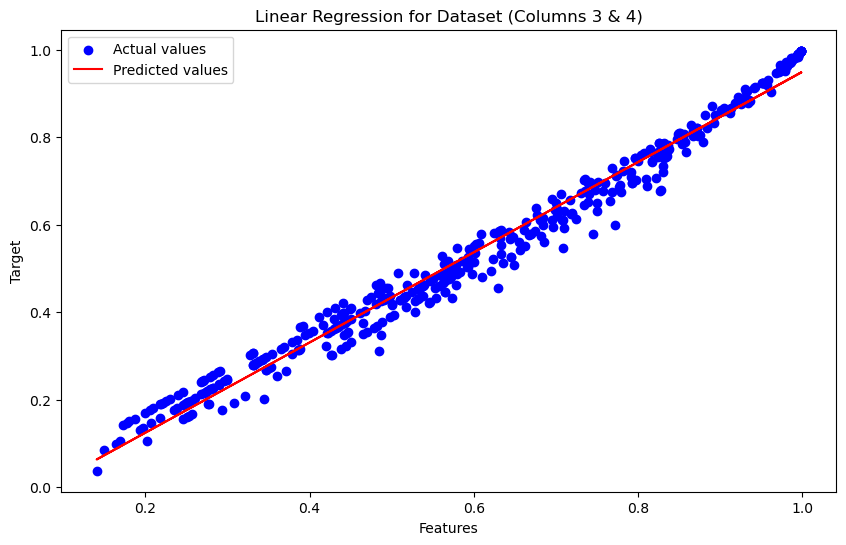

Linear Regression for Columns 3 & 4 - R-squared: 0.98
Linear Regression for Columns 3 & 4 - Mean Squared Error: 0.00


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the CSV file into a DataFrame
csv_file_path = '/Users/schoudhry/Desktop/Supplementary Tables S8 S8.csv'
df8 = pd.read_csv(csv_file_path)

# Define the columns of interest
columns_of_interest = [df8.columns[2], df8.columns[3]]
filtered_df = df8[columns_of_interest]

# Ensure the columns are numeric and drop rows with missing values
filtered_df8 = filtered_df.apply(pd.to_numeric, errors='coerce').dropna()

# Prepare the data for linear regression
X = filtered_df8[filtered_df8.columns[:-1]].values
Y = filtered_df8[filtered_df8.columns[-1]].values

# Create and fit the linear regression model
regressor = LinearRegression()
regressor.fit(X, Y)
y_pred = regressor.predict(X)

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], Y, color='blue', label='Actual values')
plt.plot(X[:, 0], y_pred, color='red', label='Predicted values')
plt.xlabel('Features')
plt.ylabel('Target')
plt.title('Linear Regression for Dataset (Columns 3 & 4)')
plt.legend()
plt.show()

# Function for linear regression analysis
def linear_regression_analysis(X, Y, y_pred, title):
    if X.shape[0] == 0 or Y.shape[0] == 0:
        print(f"No data available for {title}")
        return
    
    r_squared = r2_score(Y, y_pred)
    mse = mean_squared_error(Y, y_pred)
    
    print(f"{title} - R-squared: {r_squared:.2f}")
    #print(f"{title} - Mean Squared Error: {mse:.2f}")

# Perform linear regression analysis
linear_regression_analysis(X, Y, y_pred, 'Linear Regression for Columns 3 & 4')
